In [1]:

import pandas as pd
import numpy as np

In [2]:
# First, import the class data
data = pd.read_excel("~/class.xlsx")
data.head()

,The perceptron as a gradient algorithm,Height,Weight,Gender,Age,Sporthours/week,"Location: (0 Village, 1: Town, 2: City, 3: Megacity)"
0,CD,178,81,M,49,7,1
1,TB,180,75,M,22,16,1
2,BL,169,53,F,20,0,2
3,KG,183,80,M,25,1,1
4,TR,190,65,M,25,5,0


In [14]:
# Try to predict weight from height
X = data["Height"]
Y = data["Weight"]
X.at[0] /= 10

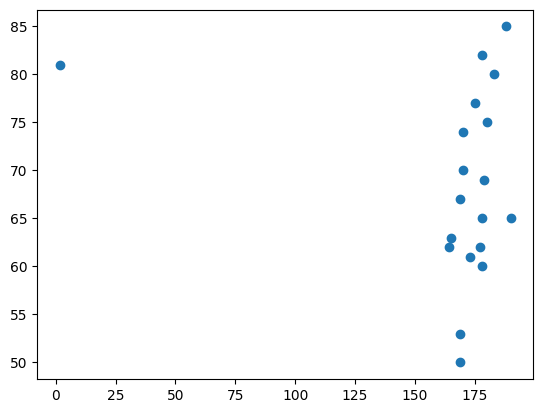

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)


In [5]:
# Calculate the mean-square loss over all examples
def mse_loss(f, X, Y):
    mse = 0
    for t in range(len(Y)):
        a = f.predict(X[t])
        mse += abs(a - Y[t])**2
        #print(X[t], Y[t], a)
    return mse / len(Y)


In [6]:
# We define linear functions as a class for simplicity of implem,entation
class LinearFunction:
    def __init__(self, n):
        self.params = np.zeros(n)
        self.n_in = n
    def predict(self, x):
        print(self.params, x)
        return np.dot(self.params, x)

# One-dimensional example

Here we just look at single parameter prediction functions

$$f_\beta(x) = \beta x,$$

with $x, \beta \in \mathbb{R}$. So there is only one input and one parameter. This allows us to visualise the MSE on the data for different values of $\beta$:

$$L(D, \beta) = \frac{1}{|D|}\sum_{(x,y) \in D} \ell(f_\beta(x), y),$$

with $\ell(a, y) = (a - y)^2$.



In [7]:
# Here we calculate the MSE of that function for different values of beta
a = 0
n_samples = 100
beta = 0.3+ 0.2*np.arange(0, n_samples)/n_samples # search for a range between 0 and 1
print(beta)
mse = np.zeros(n_samples)
for k in range(n_samples):
    fun = LinearFunction(1)
    fun.params[0] = beta[k]
    mse[k] = mse_loss(fun, X, Y)
    
beta_min = beta[np.argmin(mse)]
print(beta_min)

[0.3   0.302 0.304 0.306 0.308 0.31  0.312 0.314 0.316 0.318 0.32  0.322
 0.324 0.326 0.328 0.33  0.332 0.334 0.336 0.338 0.34  0.342 0.344 0.346
 0.348 0.35  0.352 0.354 0.356 0.358 0.36  0.362 0.364 0.366 0.368 0.37
 0.372 0.374 0.376 0.378 0.38  0.382 0.384 0.386 0.388 0.39  0.392 0.394
 0.396 0.398 0.4   0.402 0.404 0.406 0.408 0.41  0.412 0.414 0.416 0.418
 0.42  0.422 0.424 0.426 0.428 0.43  0.432 0.434 0.436 0.438 0.44  0.442
 0.444 0.446 0.448 0.45  0.452 0.454 0.456 0.458 0.46  0.462 0.464 0.466
 0.468 0.47  0.472 0.474 0.476 0.478 0.48  0.482 0.484 0.486 0.488 0.49
 0.492 0.494 0.496 0.498]
[0.3] 178
[0.3] 180
[0.3] 169
[0.3] 183
[0.3] 190
[0.3] 178
[0.3] 188
[0.3] 178
[0.3] 179
[0.3] 178
[0.3] 175
[0.3] 177
[0.3] 173
[0.3] 164
[0.3] 170
[0.3] 170
[0.3] 169
[0.3] 165
[0.3] 169
[0.302] 178
[0.302] 180
[0.302] 169
[0.302] 183
[0.302] 190
[0.302] 178
[0.302] 188
[0.302] 178
[0.302] 179
[0.302] 178
[0.302] 175
[0.302] 177
[0.302] 173
[0.302] 164
[0.302] 170
[0.302] 170
[0.302] 16

Text(0.5, 1.0, 'MSE loss for $f_\\beta(x) = \\beta x$')

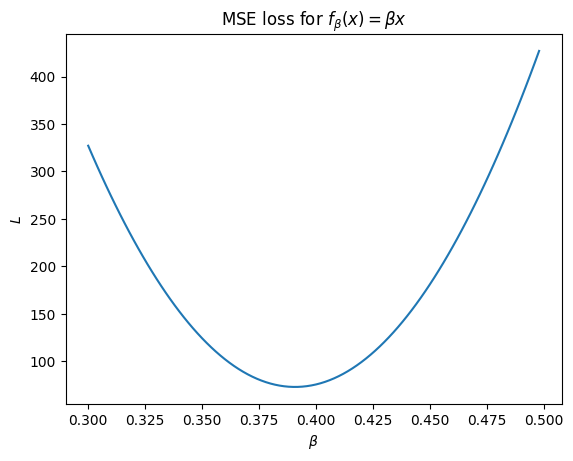

In [8]:
plt.plot(beta, mse)
plt.xlabel("$\\beta$")
plt.ylabel("$L$")
plt.title("MSE loss for $f_\\beta(x) = \\beta x$")

[0.39] 164
[0.39] 165
[0.39] 166
[0.39] 167
[0.39] 168
[0.39] 169
[0.39] 170
[0.39] 171
[0.39] 172
[0.39] 173
[0.39] 174
[0.39] 175
[0.39] 176
[0.39] 177
[0.39] 178
[0.39] 179
[0.39] 180
[0.39] 181
[0.39] 182
[0.39] 183
[0.39] 184
[0.39] 185
[0.39] 186
[0.39] 187
[0.39] 188
[0.39] 189
Best beta value: 0.39
[1.] 164
[1.] 165
[1.] 166
[1.] 167
[1.] 168
[1.] 169
[1.] 170
[1.] 171
[1.] 172
[1.] 173
[1.] 174
[1.] 175
[1.] 176
[1.] 177
[1.] 178
[1.] 179
[1.] 180
[1.] 181
[1.] 182
[1.] 183
[1.] 184
[1.] 185
[1.] 186
[1.] 187
[1.] 188
[1.] 189
[0.1] 164
[0.1] 165
[0.1] 166
[0.1] 167
[0.1] 168
[0.1] 169
[0.1] 170
[0.1] 171
[0.1] 172
[0.1] 173
[0.1] 174
[0.1] 175
[0.1] 176
[0.1] 177
[0.1] 178
[0.1] 179
[0.1] 180
[0.1] 181
[0.1] 182
[0.1] 183
[0.1] 184
[0.1] 185
[0.1] 186
[0.1] 187
[0.1] 188
[0.1] 189


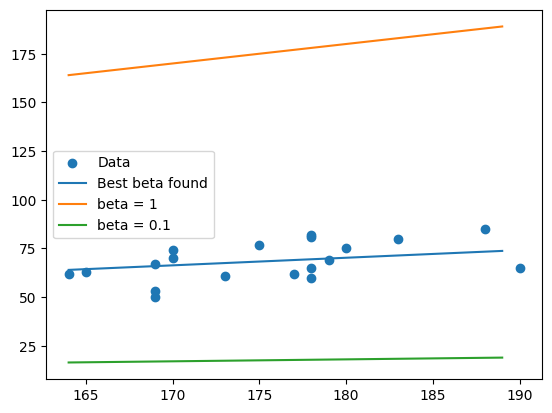

In [9]:
plt.scatter(X, Y)
x_range = np.arange(min(X), max(X))
fun = LinearFunction(1)
fun.params[0] = beta_min
y_range = [fun.predict(x) for x in x_range]
plt.plot(x_range, y_range)
print("Best beta value:", beta_min)
fun.params[0] = 1
y_range = [fun.predict(x) for x in x_range]
plt.plot(x_range, y_range)
fun.params[0] = 0.1
y_range = [fun.predict(x) for x in x_range]
plt.plot(x_range, y_range)
plt.legend(["Data", "Best beta found", "beta = 1", "beta = 0.1"])

# One-dimensional example

Here we just look at single parameter prediction functions

$$f_\beta(x) = \beta + 0 x,$$

with $x, \beta \in \mathbb{R}$. So there is only one input and one parameter. This allows us to visualise the MSE on the data for different values of $\beta$:

$$L(D, \beta) = \frac{1}{|D|}\sum_{(x,y) \in D} \ell(f_\beta(x), y),$$

with $\ell(a, y) = (a - y)^2$.



In [10]:
import statsmodels.api as sm
Xa = sm.add_constant(np.array(X))
Xa

array([[  1., 178.],
       [  1., 180.],
       [  1., 169.],
       [  1., 183.],
       [  1., 190.],
       [  1., 178.],
       [  1., 188.],
       [  1., 178.],
       [  1., 179.],
       [  1., 178.],
       [  1., 175.],
       [  1., 177.],
       [  1., 173.],
       [  1., 164.],
       [  1., 170.],
       [  1., 170.],
       [  1., 169.],
       [  1., 165.],
       [  1., 169.]])

In [11]:
a = 0
n_samples = 100
beta = 0.3+ 0.2*np.arange(0, n_samples)/n_samples # search for a range between 0 and 1
print(beta)
mse = np.zeros(n_samples)
for k in range(n_samples):
    fun = LinearFunction(2)
    fun.params[0] = beta[k]
    fun.params[1] = 0
    mse[k] = mse_loss(fun, Xa, Y)
    
beta_min = beta[np.argmin(mse)]
print(beta_min)

[0.3   0.302 0.304 0.306 0.308 0.31  0.312 0.314 0.316 0.318 0.32  0.322
 0.324 0.326 0.328 0.33  0.332 0.334 0.336 0.338 0.34  0.342 0.344 0.346
 0.348 0.35  0.352 0.354 0.356 0.358 0.36  0.362 0.364 0.366 0.368 0.37
 0.372 0.374 0.376 0.378 0.38  0.382 0.384 0.386 0.388 0.39  0.392 0.394
 0.396 0.398 0.4   0.402 0.404 0.406 0.408 0.41  0.412 0.414 0.416 0.418
 0.42  0.422 0.424 0.426 0.428 0.43  0.432 0.434 0.436 0.438 0.44  0.442
 0.444 0.446 0.448 0.45  0.452 0.454 0.456 0.458 0.46  0.462 0.464 0.466
 0.468 0.47  0.472 0.474 0.476 0.478 0.48  0.482 0.484 0.486 0.488 0.49
 0.492 0.494 0.496 0.498]
[0.3 0. ] [  1. 178.]
[0.3 0. ] [  1. 180.]
[0.3 0. ] [  1. 169.]
[0.3 0. ] [  1. 183.]
[0.3 0. ] [  1. 190.]
[0.3 0. ] [  1. 178.]
[0.3 0. ] [  1. 188.]
[0.3 0. ] [  1. 178.]
[0.3 0. ] [  1. 179.]
[0.3 0. ] [  1. 178.]
[0.3 0. ] [  1. 175.]
[0.3 0. ] [  1. 177.]
[0.3 0. ] [  1. 173.]
[0.3 0. ] [  1. 164.]
[0.3 0. ] [  1. 170.]
[0.3 0. ] [  1. 170.]
[0.3 0. ] [  1. 169.]
[0.3 0. ] [  1. 16

[0.498 0.   ] 164
[0.498 0.   ] 165
[0.498 0.   ] 166
[0.498 0.   ] 167
[0.498 0.   ] 168
[0.498 0.   ] 169
[0.498 0.   ] 170
[0.498 0.   ] 171
[0.498 0.   ] 172
[0.498 0.   ] 173
[0.498 0.   ] 174
[0.498 0.   ] 175
[0.498 0.   ] 176
[0.498 0.   ] 177
[0.498 0.   ] 178
[0.498 0.   ] 179
[0.498 0.   ] 180
[0.498 0.   ] 181
[0.498 0.   ] 182
[0.498 0.   ] 183
[0.498 0.   ] 184
[0.498 0.   ] 185
[0.498 0.   ] 186
[0.498 0.   ] 187
[0.498 0.   ] 188
[0.498 0.   ] 189
Best beta value: 0.498
[1. 0.] 164
[1. 0.] 165
[1. 0.] 166
[1. 0.] 167
[1. 0.] 168
[1. 0.] 169
[1. 0.] 170
[1. 0.] 171
[1. 0.] 172
[1. 0.] 173
[1. 0.] 174
[1. 0.] 175
[1. 0.] 176
[1. 0.] 177
[1. 0.] 178
[1. 0.] 179
[1. 0.] 180
[1. 0.] 181
[1. 0.] 182
[1. 0.] 183
[1. 0.] 184
[1. 0.] 185
[1. 0.] 186
[1. 0.] 187
[1. 0.] 188
[1. 0.] 189
[0.1 0. ] 164
[0.1 0. ] 165
[0.1 0. ] 166
[0.1 0. ] 167
[0.1 0. ] 168
[0.1 0. ] 169
[0.1 0. ] 170
[0.1 0. ] 171
[0.1 0. ] 172
[0.1 0. ] 173
[0.1 0. ] 174
[0.1 0. ] 175
[0.1 0. ] 176
[0.1 0. ] 177
[

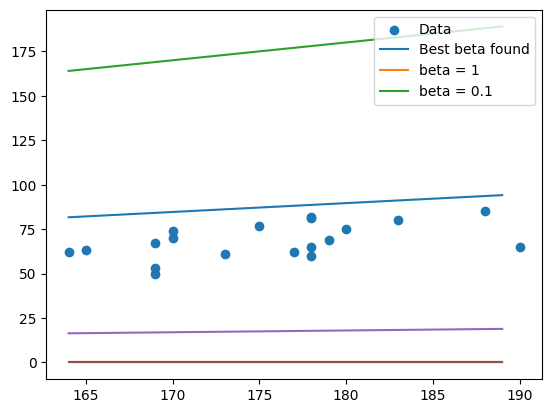

In [12]:
plt.clf()
plt.scatter(X, Y)
x_range = np.arange(min(X), max(X))
fun = LinearFunction(2)
fun.params[0] = beta_min
fun.params[1] = 0
y_range = [fun.predict(sm.add_constant(np.array(x))) for x in x_range]
plt.plot(x_range, y_range)
print("Best beta value:", beta_min)
fun.params[0] = 1
y_range = [fun.predict(sm.add_constant(x)) for x in x_range]
plt.plot(x_range, y_range)
fun.params[0] = 0.1
y_range = [fun.predict(sm.add_constant(x)) for x in x_range]
plt.plot(x_range, y_range)
plt.legend(["Data", "Best beta found", "beta = 1", "beta = 0.1"])